# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  We will load and view the data using a package called `pandas`. 

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load data
df_tfl = pd.read_csv('/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [6]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [7]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 2a) Plot the data in a scatterplot

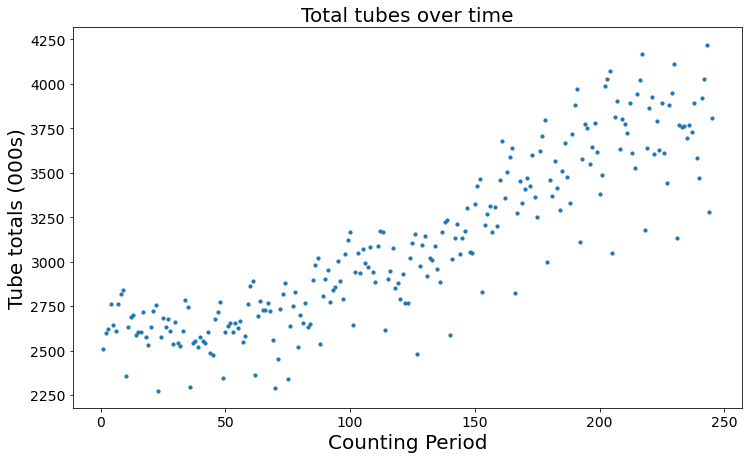

In [8]:
#Your code for scatterplot here
# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(xvals, yvals, s=10)   # s can be used to adjust the size of the dots
plt.ylabel('Tube totals (000s)')
plt.xlabel('Counting Period')
plt.title('Total tubes over time')
plt.show()


## 2b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

Regression coefficients: beta_0 = 2367.382 	 beta_1 =  5.939


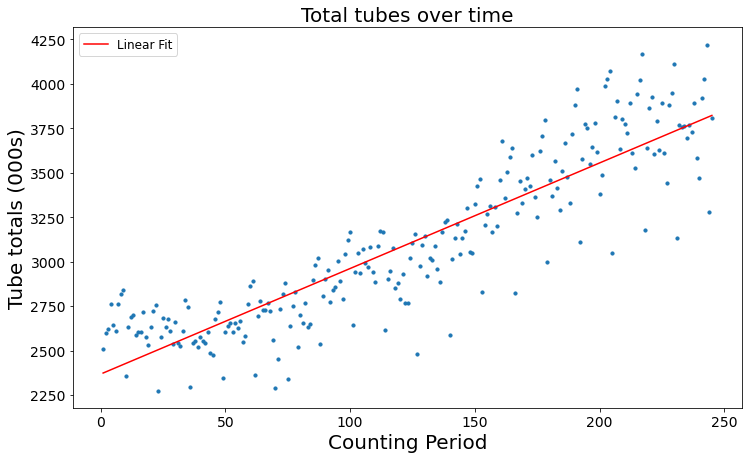

 MSE  is 45323.64
 R^2  is 0.7956


In [22]:
def polyreg(data_matrix, k):
  
  N = np.shape(data_matrix)[0]
  xvals = np.transpose(data_matrix)[0]
  yvals = np.transpose(data_matrix)[1]
  all_ones = np.ones(np.shape(yvals))

  # Create matrix X which contains all ones in first column, and dates in the second
  list = []
  list.append(all_ones)
  if (k<N):
    for i in range(k):
      list.append(xvals**(i+1))
  elif(k>=N):
    for j in range(N-1):
      list.append(xvals**(j+1))
    for i in range(N,k):
      list.append(np.zeros(N))
  list = tuple(list)
  X  = np.column_stack(list)

  # Computing the optimum coefficient vector beta* using the formula
  XT = X.T  # transpose
  beta_lin =  np.linalg.lstsq(X, yvals, rcond=None)[0]

  # Computing the fit of the model
  fit_lin = X.dot(beta_lin)  

  #Compute the residuals
  resid_lin = yvals - fit_lin
  return beta_lin, fit_lin, resid_lin

datamatrix= np.stack((xvals, yvals), axis = 1)
fit_lin  = polyreg(datamatrix,1)[1]
beta = polyreg(datamatrix,1)[0]
beta_0 = beta[0]
beta_1 = beta[1]
print('Regression coefficients: beta_0 =', np.round(beta[0], decimals =3), 
      '\t beta_1 = ', np.round(beta[1], decimals =3))
plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(xvals, yvals, s=10)   # s can be used to adjust the size of the dots
plt.ylabel('Tube totals (000s)')
plt.xlabel('Counting Period')
plt.title('Total tubes over time')
plt.plot(xvals, fit_lin, color = 'red', label = 'Linear Fit')
plt.legend(fontsize = 'large')
plt.show()

SSE = np.linalg.norm(yvals - fit_lin)**2
SSE_0 = np.linalg.norm(yvals - polyreg(datamatrix,0)[1])**2
print (" MSE  is",np.round(SSE/np.size(yvals) , 2) )
R_2 = np.round(1-SSE/SSE_0, decimals=4)
print (" R^2  is",R_2 )



## 2c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

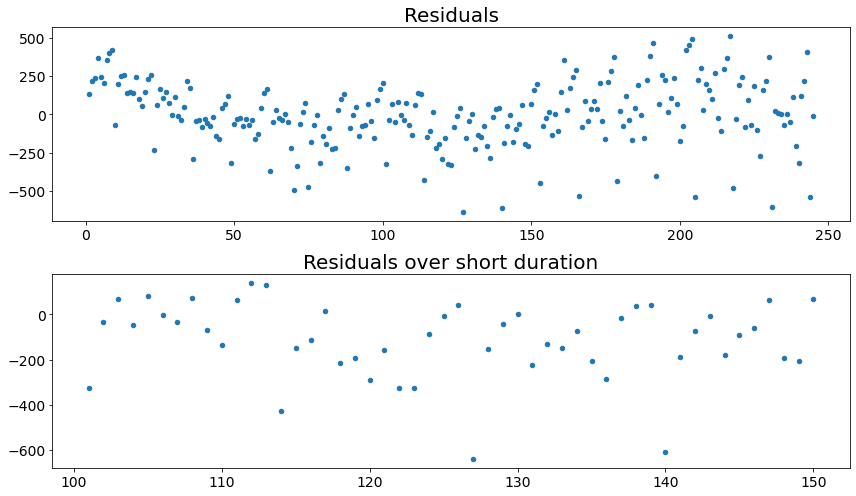

In [29]:
# Your code here
residual = polyreg(datamatrix,1)[2]

plt.rcParams['figure.figsize'] = [12, 7]
plt.subplot(2, 1, 1)
plt.scatter(xvals, residual, s=20)
plt.title('Residuals')

plt.subplot(2, 1, 2)
plt.scatter(xvals[100:150], residual[100:150], s=20) 
plt.title(('Residuals over short duration'))

plt.tight_layout()
plt.show()


There is a periodic sinusoidal, with a period of about 15. This means we need to superpose the periodic components over the linear model to make the fit more accurate.

## 2d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


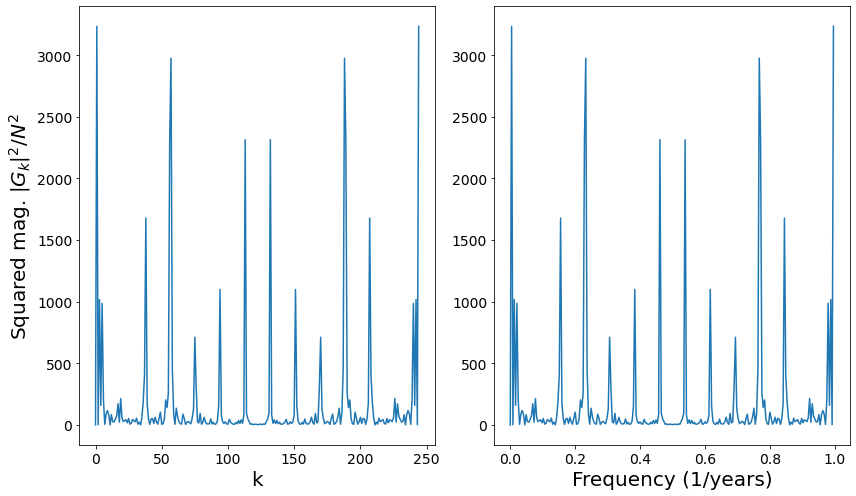

In [32]:
# Your code to compute and plot the histogram
N = np.size(xvals)
T = xvals[101] - xvals[100]  # This can be the time interval between any two successive values.
plt.rcParams['figure.figsize'] = [12, 7]

pgram = np.abs(np.fft.fft(residual, N)/N)**2 
indices = np.linspace(0, (N-1), num = N)
freqs_hz = indices/(N*T)
freqs_rads = freqs_hz*2*math.pi

plt.subplot(121)
plt.plot(indices, pgram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')
plt.subplot(122)
plt.plot(freqs_hz, pgram)
plt.xlabel('Frequency (1/years)')  
plt.tight_layout()

In [31]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum
top_inds = indices[(pgram > 0.5*np.max(pgram))]
top_freqs_hz = freqs_hz[(pgram > 0.5*np.max(pgram))]
print('Top indices:', top_inds, ' Top frequencies in Hz:', top_freqs_hz)

Top indices: [  1.  38.  56.  57. 113. 132. 188. 189. 207. 244.]  Top frequencies in Hz: [0.00408163 0.15510204 0.22857143 0.23265306 0.46122449 0.53877551
 0.76734694 0.77142857 0.84489796 0.99591837]


## 2e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

All numerical outputs should be displayed to three decimal places.

In [36]:
# Your code here
w = 2*math.pi*top_inds[0]/(N*T)  # Freq. in rad/s corresponding to k* is w = 2.pi.k*/(NT)

# Now form the X matrix with columns sin(wx) and cos(wx) for x in dates. First define its transpose
XT = np.vstack((np.sin(w*xvals), np.cos(w*xvals)))
X = np.transpose(XT)

beta_sc = np.linalg.inv(XT.dot(X)).dot(XT).dot(residual) # Calculating the least-squares coefficients
print('The coefficients beta_s, beta_c are:',np.round(beta_sc, 3))
fit_sc = X.dot(beta_sc)

resid_final = residual - fit_sc
SSE_final = np.linalg.norm(resid_final)**2
SSE_0 = np.linalg.norm(residual - np.mean(residual))**2
R_2 = 1 - SSE_final/SSE_0
MSE = np.round(SSE_final/np.size(yvals))
print (" MSE  is", MSE , 3)
print (" R^2  is",np.round(R_2, decimals =3))

The coefficients beta_s, beta_c are: [-51.253 101.556]
 MSE  is 38853.0 3
 R^2  is 0.143


It improved to fit the residuals over the linear fit. 

## 2f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

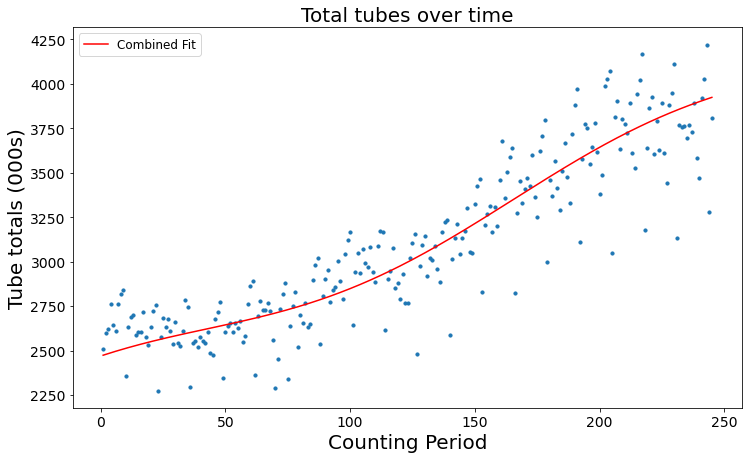

Mean squared error for the combined fit =  38853.0
R^2 coefficient of combined fit =  0.825


In [38]:
fit_combined = fit_lin + fit_sc
#resid_comb = yvalues - fit_combined # This will is the same as resid_final computed above

plt.rcParams['figure.figsize'] = [14, 8]


plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(xvals, yvals, s=10)   # s can be used to adjust the size of the dots
plt.ylabel('Tube totals (000s)')
plt.xlabel('Counting Period')
plt.title('Total tubes over time')
plt.plot(xvals, fit_combined, color = 'red', label = 'Combined Fit')
plt.legend(fontsize = 'large')
plt.show()

print('Mean squared error for the combined fit = ', np.round(MSE,3))

SSE_0 = np.linalg.norm(yvals - np.mean(yvals))**2
R2_combined = 1 - SSE_final/SSE_0
print('R^2 coefficient of combined fit = ', np.round(R2_combined, 3))

The combined fit is more accurate as the R value has increased to 0.825. 